In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow import keras
import cv2
from skimage.io import imread
from sklearn.metrics import confusion_matrix

In [11]:
df= pd.read_csv('.\\source\\train_set.csv')

In [12]:
df.tail()

,id_img,path,label
28816,9969,../data/images/train/surprise\9969.jpg,surprise
28817,9985,../data/images/train/surprise\9985.jpg,surprise
28818,9990,../data/images/train/surprise\9990.jpg,surprise
28819,9992,../data/images/train/surprise\9992.jpg,surprise
28820,9996,../data/images/train/surprise\9996.jpg,surprise


In [8]:
df.value_counts('label')

label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

### Cambiar los paths para que cv2.read los entienda

In [13]:
df['path'] = df['path'].str.replace('\\', '/')
df['path'] = df['path'].str.replace('data', './source/data/data')
df['path'] = df['path'].str.replace('../', '')

In [14]:
df.head(1)

,id_img,path,label
0,0,./source/data/data/images/train/angry/0.jpg,angry


### Función para cargar imágenes como arrays, siguiendo los paths que existen en el archivo de train.


In [15]:
def cargar_y_convertir_imagen(ruta_imagen):
    image = cv2.imread(ruta_imagen, 0)
    image_array = np.array(image)
    return image_array

df['images'] =df['path'].apply(cargar_y_convertir_imagen)

In [16]:
df.head()

,id_img,path,label,images
0,0,./source/data/data/images/train/angry/0.jpg,angry,"[[72, 78, 81, 75, 59, 54, 63, 61, 55, 55, 62, ..."
1,1,./source/data/data/images/train/angry/1.jpg,angry,"[[152, 149, 147, 157, 146, 133, 114, 138, 170,..."
2,10,./source/data/data/images/train/angry/10.jpg,angry,"[[29, 25, 21, 23, 26, 24, 49, 67, 85, 101, 121..."
3,10002,./source/data/data/images/train/angry/10002.jpg,angry,"[[32, 23, 20, 56, 43, 34, 38, 46, 92, 99, 34, ..."
4,10016,./source/data/data/images/train/angry/10016.jpg,angry,"[[222, 218, 202, 189, 199, 208, 193, 134, 103,..."


In [17]:
pixel_array = np.array(df['images'].apply(np.array).tolist())

In [18]:
pixel_array.shape

(28821, 48, 48)

In [19]:
pixel_array  = pixel_array / 255.0

[[0.28235294 0.30588235 0.31764706 ... 0.20392157 0.16862745 0.15686275]
 [0.25490196 0.24313725 0.23137255 ... 0.21568627 0.20392157 0.17647059]
 [0.18431373 0.16470588 0.23529412 ... 0.18431373 0.21176471 0.19215686]
 ...
 [0.35686275 0.25490196 0.18039216 ... 0.29019608 0.21176471 0.16862745]
 [0.29803922 0.31372549 0.29803922 ... 0.42352941 0.27058824 0.18039216]
 [0.30196078 0.29019608 0.31764706 ... 0.41176471 0.42352941 0.32156863]]
[[0.28235294 0.30588235 0.31764706 ... 0.20392157 0.16862745 0.15686275]
 [0.25490196 0.24313725 0.23137255 ... 0.21568627 0.20392157 0.17647059]
 [0.18431373 0.16470588 0.23529412 ... 0.18431373 0.21176471 0.19215686]
 ...
 [0.35686275 0.25490196 0.18039216 ... 0.29019608 0.21176471 0.16862745]
 [0.29803922 0.31372549 0.29803922 ... 0.42352941 0.27058824 0.18039216]
 [0.30196078 0.29019608 0.31764706 ... 0.41176471 0.42352941 0.32156863]]


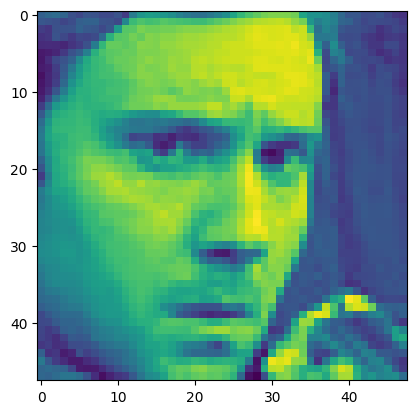

In [20]:
import matplotlib.pyplot as plt
plt.imshow(pixel_array[0])
print(pixel_array[0])
print(pixel_array[0])

In [21]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [22]:
def read_label(path):
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):

            y.append(label)
    
    return np.array(y)

In [25]:
y=read_label('./source/data/data/images/train/')

In [26]:
y.shape

(28821,)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(pixel_array, y, shuffle=True, random_state=42, test_size=.2)

In [101]:
model = keras.Sequential([
    keras.layers.Conv2D(128,(3,3), activation="relu", input_shape=(48, 48, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(64,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(64,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(7, activation="softmax")
])

In [ ]:
# COPY CÓDIGO ANTERIOR-Añade kernel_regularizer a las capas
from tensorflow.keras import regularizers

model = keras.Sequential([
    keras.layers.Conv2D(128, (3,3), activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(48, 48, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(64, (3,3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(64, (3,3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(32, (3,3), activation="relu", kernel_regularizer=regularizers.l2(0.01)),     # Añade otra capa
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),      # Aumenta en 64
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation="relu"),      # 
    keras.layers.Dropout(0.1),                      #
    keras.layers.Dense(7, activation="softmax")
])


In [102]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
# COPY.
# En optimizer, se establece una tasa de aprendizaje.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
# COPY
# Experimenta con técnicas de aumento de datos, como rotación, traslación y cambio de escala para aumentar la variabilidad del train.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

datagen.fit(X_train)

In [103]:
history = model.fit(X_train, y_train, batch_size=256, epochs=15, validation_split=0.2)

# COPY. Aumenta las épocas y utiliza datagen.flow (...)
# history = model.fit(datagen.flow(X_train, y_train, batch_size=256), epochs=30, validation_data=(X_test, y_test))

Epoch 1/15
73/73 [==============================] - 41s 550ms/step - loss: 1.8307 - accuracy: 0.2342 - val_loss: 1.7813 - val_accuracy: 0.2489
Epoch 2/15
73/73 [==============================] - 37s 511ms/step - loss: 1.7637 - accuracy: 0.2707 - val_loss: 1.6799 - val_accuracy: 0.3255
Epoch 3/15
73/73 [==============================] - 38s 521ms/step - loss: 1.6329 - accuracy: 0.3594 - val_loss: 1.5679 - val_accuracy: 0.3990
Epoch 4/15
73/73 [==============================] - 37s 508ms/step - loss: 1.5423 - accuracy: 0.4022 - val_loss: 1.4910 - val_accuracy: 0.4252
Epoch 5/15
73/73 [==============================] - 38s 514ms/step - loss: 1.4772 - accuracy: 0.4340 - val_loss: 1.4133 - val_accuracy: 0.4545
Epoch 6/15
73/73 [==============================] - 39s 541ms/step - loss: 1.4185 - accuracy: 0.4612 - val_loss: 1.4052 - val_accuracy: 0.4586
Epoch 7/15
73/73 [==============================] - 36s 498ms/step - loss: 1.3775 - accuracy: 0.4703 - val_loss: 1.3478 - val_accuracy: 0.4857

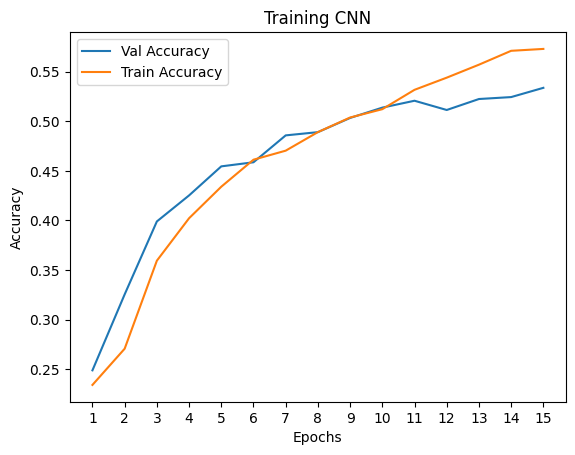

In [105]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,16))

plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label="Train Accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,16))
plt.legend()

In [66]:
df_test = pd.read_csv('.\\source\\test_set.csv')
 

In [67]:
df_test.head(1)

,id_img
0,10052


In [85]:
df_test.shape

(7066, 3)

In [68]:
def agregar_rutas_imagenes(df, ruta_carpeta):

    rutas_imagenes = []
    for idx, fila in df.iterrows():
        id_imagen = fila['id_img'] 
        nombre_imagen = f"{id_imagen}.jpg" 
        ruta_imagen = os.path.join(ruta_carpeta, nombre_imagen)
        rutas_imagenes.append(ruta_imagen)

    df['RutaImagen'] = rutas_imagenes

ruta_carpeta_imagenes = './source/data/data/images/test/'

agregar_rutas_imagenes(df_test, ruta_carpeta_imagenes)

In [71]:
df_test.head(1)

,id_img,RutaImagen,images
0,10052,./source/data/data/images/test/10052.jpg,"[[58, 66, 70, 77, 117, 154, 137, 108, 76, 70, ..."


In [70]:
df_test['images'] =df_test['RutaImagen'].apply(cargar_y_convertir_imagen)

In [72]:
pixel_array_test = np.array(df_test['images'].apply(np.array).tolist())

In [80]:
pixel_array_test  = pixel_array_test /255

In [81]:
pixel_array_test

array([[[0.22745098, 0.25882353, 0.2745098 , ..., 0.2       ,
         0.18431373, 0.1372549 ],
        [0.24313725, 0.25098039, 0.28627451, ..., 0.23137255,
         0.2       , 0.16470588],
        [0.25882353, 0.27058824, 0.34117647, ..., 0.22745098,
         0.21176471, 0.20784314],
        ...,
        [0.03137255, 0.05882353, 0.0745098 , ..., 0.01960784,
         0.02745098, 0.03137255],
        [0.02352941, 0.05490196, 0.06666667, ..., 0.01568627,
         0.02745098, 0.03921569],
        [0.03137255, 0.05882353, 0.07843137, ..., 0.01960784,
         0.02745098, 0.03529412]],

       [[0.09019608, 0.10196078, 0.08235294, ..., 0.85098039,
         0.8627451 , 0.85490196],
        [0.09803922, 0.14117647, 0.0627451 , ..., 0.81960784,
         0.79607843, 0.81568627],
        [0.11764706, 0.10980392, 0.04313725, ..., 0.70196078,
         0.83921569, 0.96078431],
        ...,
        [0.18823529, 0.16862745, 0.21568627, ..., 0.8745098 ,
         0.87058824, 0.87058824],
        [0.1

In [106]:
predicciones = model.predict(pixel_array_test)

221/221 [==============================] - 3s 15ms/step


In [84]:
len(predicciones)

7066

In [107]:
pred_labels = np.argmax(predicciones, axis=1)


In [108]:
pred_labels

array([0, 2, 0, ..., 6, 2, 6], dtype=int64)

In [ ]:
df_test

In [109]:
label_pred = [class_names[pred] for pred in pred_labels]

In [92]:
len(label_pred)

7066

In [110]:
submission= pd.DataFrame()

In [111]:
submission['id_img']= df_test['id_img']

In [112]:
submission['label']=label_pred

In [96]:
submission.head()

,id_img,label
0,10052,sad
1,10065,fear
2,10079,neutral
3,10095,sad
4,10121,angry


In [113]:
submission.to_csv('submission.csv',index=False)

In [114]:
import pickle

In [116]:
with open('.\\cnn_model.pkl', "wb") as archivo_salida:
    pickle.dump(model, archivo_salida)